In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import time
from collections import defaultdict

import loading

In [22]:
def load(name):
  start = time.time()
  data = loading.read_df_from_json('data/%s.json' % name)
  print time.time() - start
  return data

In [23]:
business = load('business')
checkin = load('checkin')
photos = load('photos')
review = load('review')
tip = load('tip')
user = load('user')

8.55127310753
4.50506615639
1.97591710091
106.850568056
12.1096339226
196.392524004


In [28]:
print len(business)
print len(checkin)
print len(photos)
print len(review)
print len(tip)
print len(user)

156639
135148
196278
4736897
1028802
1183362


In [29]:
myset = set(review['business_id'])
print len(myset)

156638


In [31]:
print np.sum(business['is_open'])

132262


In [33]:
print len(set(business['city']))

1010


In [37]:
dic = defaultdict(int)
for u in review['user_id']:
  dic[u] += 1
dic2 = defaultdict(int)
for k in dic:
  dic2[dic[k]] += 1
print dic2

defaultdict(<type 'int'>, {1: 619557, 2: 197403, 3: 101101, 4: 60553, 5: 40080, 6: 28344, 7: 20798, 8: 16169, 9: 12723, 10: 10132, 11: 8384, 12: 7031, 13: 5814, 14: 5019, 15: 4426, 16: 3747, 17: 3247, 18: 2845, 19: 2525, 20: 2203, 21: 1977, 22: 1785, 23: 1609, 24: 1437, 25: 1302, 26: 1178, 27: 1074, 28: 1029, 29: 895, 30: 866, 31: 801, 32: 814, 33: 674, 34: 644, 35: 557, 36: 634, 37: 520, 38: 523, 39: 463, 40: 439, 41: 424, 42: 376, 43: 354, 44: 321, 45: 325, 46: 308, 47: 321, 48: 281, 49: 276, 50: 255, 51: 278, 52: 229, 53: 233, 54: 220, 55: 192, 56: 179, 57: 213, 58: 170, 59: 180, 60: 167, 61: 146, 62: 158, 63: 150, 64: 140, 65: 150, 66: 143, 67: 128, 68: 113, 69: 113, 70: 117, 71: 116, 72: 106, 73: 113, 74: 82, 75: 102, 76: 106, 77: 90, 78: 78, 79: 95, 80: 86, 81: 84, 82: 76, 83: 90, 84: 75, 85: 89, 86: 78, 87: 75, 88: 76, 89: 56, 90: 65, 91: 66, 92: 64, 93: 55, 94: 58, 95: 65, 96: 60, 97: 55, 98: 58, 99: 56, 100: 55, 101: 56, 102: 36, 103: 39, 104: 51, 105: 47, 106: 47, 107: 40, 10

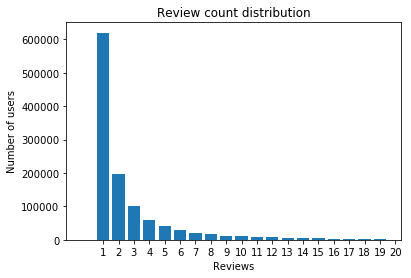

In [50]:
bins = range(20)
plt.bar(bins, [dic2[b] for b in bins])
plt.title('Review count distribution')
plt.xlabel('Reviews')
plt.ylabel('Number of users')
plt.xticks(range(1,21))
plt.show()

In [49]:
np.array([np.sum([dic2[b] for b in range(1, k+1)]) for k in range(1, 11)]) / 1183362.0

array([ 0.52355661,  0.69037201,  0.7758074 ,  0.82697771,  0.86084731,
        0.88479941,  0.90237476,  0.91603837,  0.92678994,  0.93535199])

In [68]:
dic3 = defaultdict(int)
for d in review['date']:
  dic3[d] += 1

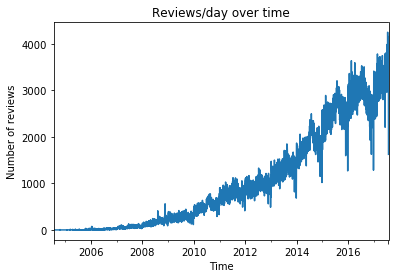

In [75]:
dates = pd.date_range(start=min(dic3.keys()), end=max(dic3.keys()))
ts = pd.Series([dic3[str(k)[:str(k).find(' ')]] for k in dates], index=dates)
ts.plot()
plt.title('Reviews/day over time')
plt.xlabel('Time')
plt.ylabel('Number of reviews')
plt.show()

In [78]:
dic4 = defaultdict(int)
for r in review['stars']:
  dic4[r] += 1

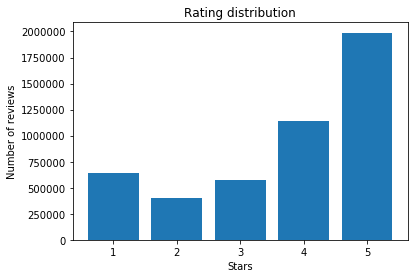

In [80]:
r = range(min(dic4.keys()), max(dic4.keys()) + 1)
plt.bar(r, [dic4[k] for k in r])
plt.title('Rating distribution')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.xticks(r)
plt.show()